In [1]:
!pip install tslearn

In [2]:
from tslearn.piecewise import PiecewiseAggregateApproximation
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [3]:
import struct
filename_seismic_query = 'seismic-query_size100_len256_znorm.bin'
with open(filename_seismic_query, 'rb') as in_file:
    time_series_seismic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

filename_synthetic_query = 'synthetic-query_size100_len256_znorm.bin'
with open(filename_synthetic_query, 'rb') as in_file:
    time_series_synthetic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

filename_seismic = 'seismic_size50k_len256_znorm.bin'
with open(filename_seismic, 'rb') as in_file:
    time_series_seismic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

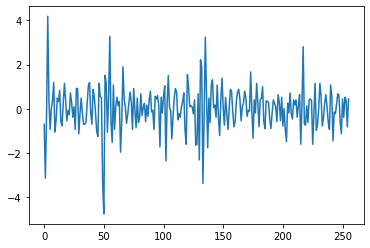

In [4]:
paa = PiecewiseAggregateApproximation(n_segments=128)
x = time_series_seismic[1,]
# t = np.linspace(0,255,256)
plt.plot(x)

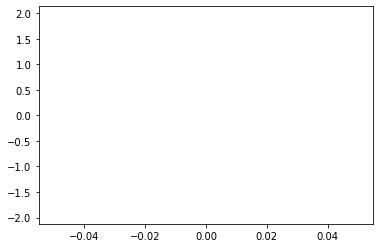

In [5]:
paa_data = paa.fit_transform(x)
y = paa_data.reshape(-1,128)
plt.plot(y)

Text(0.5, 1.0, 'Inverzná transformácia')

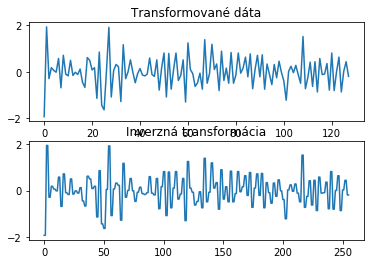

In [6]:
_, (ax1, ax2) = plt.subplots(2, 1)

ax1.plot(paa_data[0])
ax1.set_title('Transformované dáta')

ax2.plot(paa.inverse_transform(paa_data)[0])
ax2.set_title('Inverzná transformácia')